In [1]:
import sys
print(sys.path)
sys.executable

['/Users/AlaaMoussawi/Desktop/andrew_stock', '/Users/AlaaMoussawi/miniconda3/lib/python37.zip', '/Users/AlaaMoussawi/miniconda3/lib/python3.7', '/Users/AlaaMoussawi/miniconda3/lib/python3.7/lib-dynload', '', '/Users/AlaaMoussawi/miniconda3/lib/python3.7/site-packages', '/Users/AlaaMoussawi/miniconda3/lib/python3.7/site-packages/enigma_catalyst-0.5.21+3.g83e2e2b-py3.7-macosx-10.7-x86_64.egg', '/Users/AlaaMoussawi/miniconda3/lib/python3.7/site-packages/requests_toolbelt-0.8.0-py3.7.egg', '/Users/AlaaMoussawi/miniconda3/lib/python3.7/site-packages/web3-4.4.1-py3.7.egg', '/Users/AlaaMoussawi/miniconda3/lib/python3.7/site-packages/redo-2.0.1-py3.7.egg', '/Users/AlaaMoussawi/miniconda3/lib/python3.7/site-packages/boto3-1.5.27-py3.7.egg', '/Users/AlaaMoussawi/miniconda3/lib/python3.7/site-packages/ccxt-1.17.94-py3.7.egg', '/Users/AlaaMoussawi/miniconda3/lib/python3.7/site-packages/certifi-2018.1.18-py3.7.egg', '/Users/AlaaMoussawi/miniconda3/lib/python3.7/site-packages/IPython/extensions', '/

'/Users/AlaaMoussawi/miniconda3/bin/python'

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Import yfinance
import yfinance as yf

In [3]:
# Get the data for the stock Apple by specifying the stock ticker, start date, and end date
data = yf.download('AAPL','2017-01-01','2019-11-03')

[*********************100%***********************]  1 of 1 completed


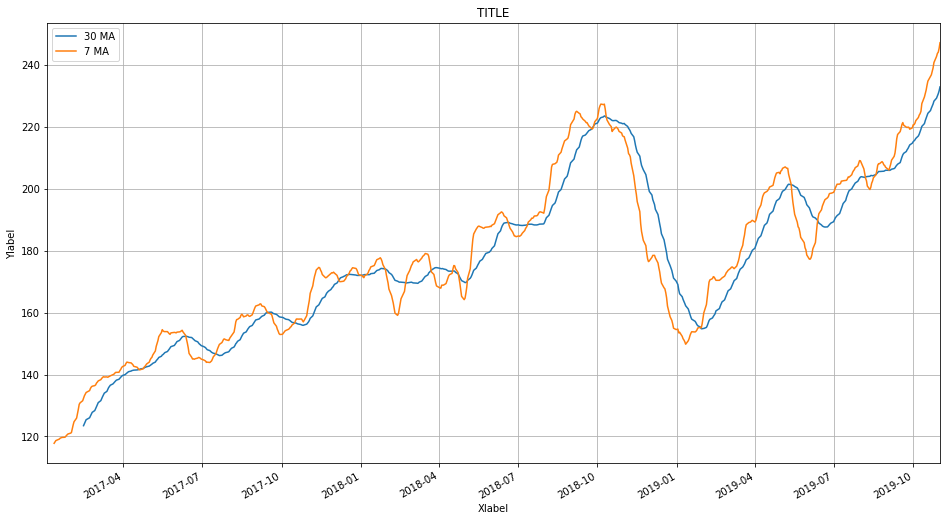

In [4]:
short_window = 7
long_window = 30

data_moving_long = data['Close'].rolling(long_window).mean()
data_moving_short = data['Close'].rolling(short_window).mean()

plt.figure(figsize=(16,9))

data_moving_long.plot(label = str(long_window) + ' MA')
data_moving_short.plot(label = str(short_window) + ' MA')

plt.title('TITLE')
plt.xlabel('Xlabel')
plt.ylabel('Ylabel')
plt.grid()
plt.legend()

plt.show()

In [5]:
def trade_algorithm(data, short_window, long_window):
    
    short_window = short_window
    long_window = long_window

    data_moving_long = data['Close'].rolling(long_window).mean()
    data_moving_short = data['Close'].rolling(short_window).mean()

    data['MA_short'] = data_moving_short
    data['MA_long'] = data_moving_long

    initial_capital = 1

    current_state = 'sell'
    holdings = initial_capital
    
    prev_MA_long = None
    prev_MA_short = None
    
    for index, value in data.iterrows():

        if np.isnan(value['MA_short']) or np.isnan(value['MA_long']):
            continue

    #     print (index, "\n", value['MA_short'], "\n", value['MA_long'])
        
        if (prev_MA_short != None) and (prev_MA_long != None) and ( prev_MA_short < prev_MA_long ) and ( value['MA_short'] > value['MA_long'] ) and (current_state == 'sell'):
            # Buy stock
            print("Buy at: \t", value['Close'], "\nHoldings in USD:\t", holdings)
            print("\n")
            
            holdings = holdings/value['Close']

            current_state = 'buy'


        elif (prev_MA_short != None) and (prev_MA_long != None) and ( prev_MA_short > prev_MA_long ) and ( value['MA_short'] < value['MA_long'] ) and (current_state == 'buy'):
            # Sell stock
            print("Sell at: \t", value['Close'], "\nHoldings in USD:\t", holdings*value['Close'])
            print("\n")
            
            holdings = holdings*value['Close']

            current_state = 'sell'

        prev_MA_short = value['MA_short']
        prev_MA_long = value['MA_long']


    if (current_state == 'buy'):
        return holdings*value['Close']
    else:
        return holdings

In [6]:
tickers = ['AAPL', 'AMZN', 'GOOG', 'FB', 'INX']
short_window = 20
long_window = 50


for i in tickers:
    data = yf.download(i,'2017-01-01','2019-11-03')
    print(i, "\n")
    trade_algorithm(data, short_window = short_window, long_window = long_window)

[*********************100%***********************]  1 of 1 completed
AAPL 

Buy at: 	 157.13999938964844 
Holdings in USD:	 1


Sell at: 	 153.80999755859375 
Holdings in USD:	 0.9788086938781415


Buy at: 	 166.88999938964844 
Holdings in USD:	 0.9788086938781415


Sell at: 	 163.02999877929688 
Holdings in USD:	 0.9561698169555894


Buy at: 	 176.94000244140625 
Holdings in USD:	 0.9561698169555894


Sell at: 	 174.72999572753906 
Holdings in USD:	 0.9442271149893183


Buy at: 	 190.0399932861328 
Holdings in USD:	 0.9442271149893183


Sell at: 	 187.8800048828125 
Holdings in USD:	 0.9334950602085821


Buy at: 	 193.0 
Holdings in USD:	 0.9334950602085821


Sell at: 	 212.24000549316406 
Holdings in USD:	 1.0265543870803677


Buy at: 	 170.88999938964844 
Holdings in USD:	 1.0265543870803677


Sell at: 	 178.97000122070312 
Holdings in USD:	 1.0750918167539092


Buy at: 	 201.5500030517578 
Holdings in USD:	 1.0750918167539092


[*********************100%***********************]  1 

In [7]:
data = yf.download('INX','2017-01-01','2019-11-03')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,0.395000,0.395000,0.395000,0.395000,0.395000,500
2017-01-04,0.395000,0.395000,0.395000,0.395000,0.395000,21500
2017-01-05,0.395000,0.400000,0.395000,0.400000,0.400000,8500
2017-01-06,0.400000,0.400000,0.400000,0.400000,0.400000,0
2017-01-09,0.400000,0.400000,0.400000,0.400000,0.400000,0
...,...,...,...,...,...,...
2018-09-19,66.150002,66.150002,66.150002,66.150002,66.150002,0
2018-09-20,66.150002,66.150002,66.150002,66.150002,66.150002,0
2018-09-21,66.150002,66.150002,66.150002,66.150002,66.150002,0


In [8]:
msft = yf.Ticker("MSFT")

# msft.history('3mo') #Get info for past year
# get stock info
msft.info

{'zip': '98052',
 'sector': 'Technology',
 'fullTimeEmployees': 144000,
 'longBusinessSummary': "Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. The company's Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); and Skype, Outlook.com, and OneDrive. It also provides LinkedIn that includes Talent and marketing solutions, and subscriptions; and Dynamics 365, a set of cloud-based and on-premises business solutions for small and medium businesses, large organizations, and divisions of enterprises. The company's Intelligent Cloud segment licenses SQL and Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also provides support services and Microsoft 